In [71]:
import plotly.express as px # gráficos dinâmicos
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Linear Regression
from sklearn.linear_model import LinearRegression

# Mostrar Residuos de Regressao
from yellowbrick.regressor import ResidualsPlot

# Pré-processamento
from sklearn.model_selection import train_test_split

# Metricas 
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Graphic objects do Plotly
import plotly.graph_objects as go

# Análise Exploratória

Com base em todos os atributos à direita (bedrooms...), determinaremos o **PREÇO**.

Nesse primeiro caso usaremos só o primeiro atributo _sqft_living_.

In [2]:
db_casas = pd.read_csv('house_prices.csv')
db_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
db_casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Para visualizar se há atributos **faltantes** utilizamos o método `isnull()` que retorna _booleanos_. Ao combinarmos com `.sum()` encontramos a quantidade de elementos.

In [4]:
## Visualizar atributos faltantes
db_casas.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

O **Pandas** tem a matriz de correlação built-in com o método `.corr()`, mas podemos utilizar também um _heatmap_ com o seaborn.  
Antes, necessário remover a coluna data.

In [5]:
db_casas.drop('date', axis='columns', inplace=True)

Analisar a segunda coluna do preço para pegar a maior correlação. A maior relevância está na nota da casa, indicada pelo label **'grade'**, **'sqft_livinf'**, **'bathrooms'**.

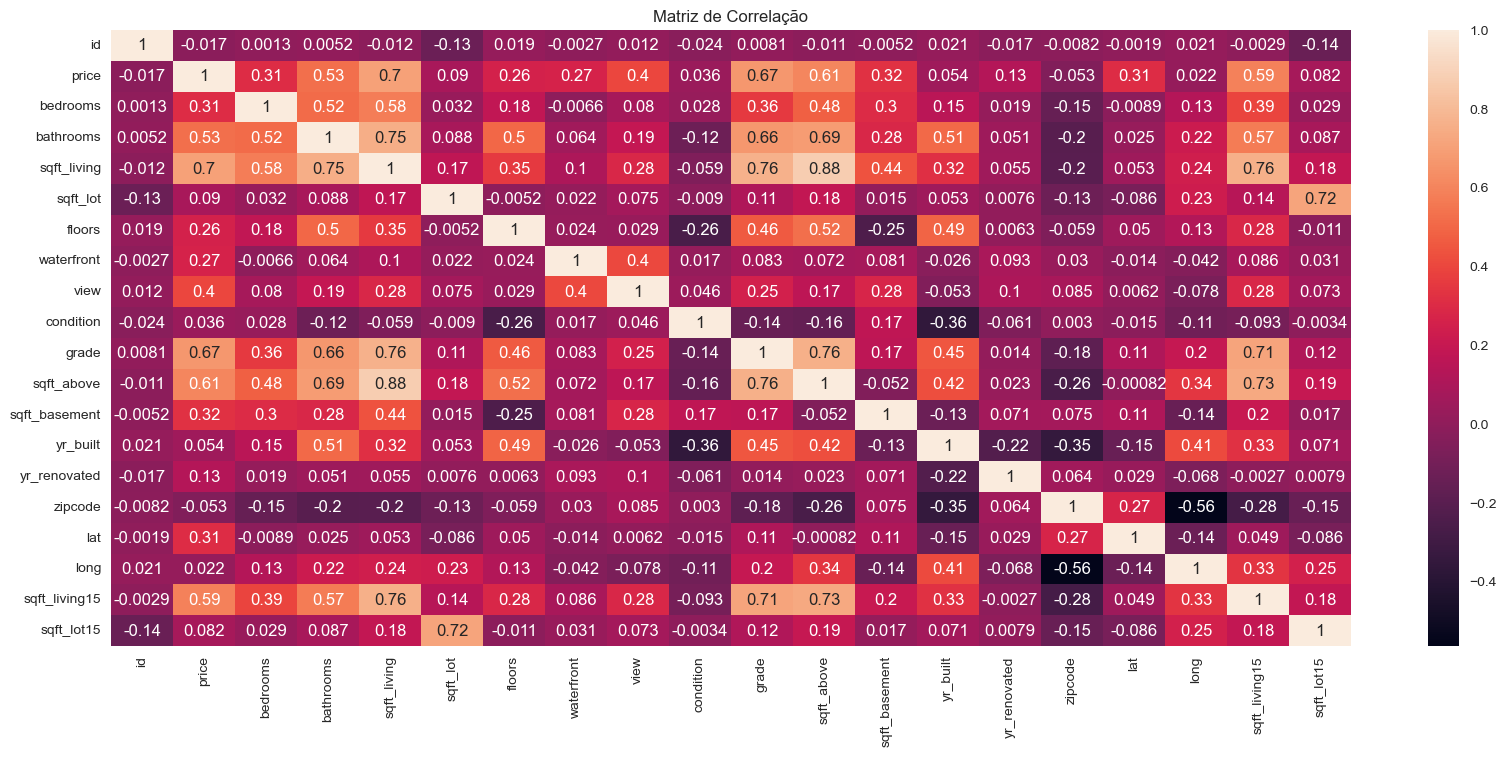

In [15]:
# Figura do Matplotlib
plt.figure(figsize=(20,8))
plt.title("Matriz de Correlação");
sns.heatmap(data=db_casas.corr(), annot=True);

In [19]:
db_casas.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


**Obs**: Se não colocar o `.values`, retorna tipo dataframe. É interessante para visualizar antes de transformar em numpy array se selecionou a coluna correta.

In [24]:
## Escolhendo como atributo previsor o sqft_living
X_casas = db_casas.iloc[:,4:5].values # metragem
y_casas = db_casas.iloc[:,1].values

X_casas, y_casas

(array([[1180],
        [2570],
        [ 770],
        ...,
        [1020],
        [1600],
        [1020]], dtype=int64),
 array([221900., 538000., 180000., ..., 402101., 400000., 325000.]))

**Divisão da base de dados**: 30% teste e 70% para treinamento

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_casas, y_casas, test_size=0.3, random_state=0)

In [38]:
print(f'Treinamento:{X_train.shape, y_train.shape}')
print(f'Teste:{X_test.shape, y_test.shape}')

Treinamento:((15129, 1), (15129,))
Teste:((6484, 1), (6484,))


In [39]:
lr_casas = LinearRegression()
lr_casas.fit(X_train, y_train)

LinearRegression()

In [40]:
# b0 e b1
lr_casas.intercept_, lr_casas.coef_

(-37893.59850106668, array([278.32860644]))

In [42]:
# Avaliação com base de treinamento -- Resultado bem baixo (49%)
lr_casas.score(X_train, y_train)

0.49453356717789787

In [43]:
# Avaliação com base de teste -- Resultado bem baixo (48%)
lr_casas.score(X_test, y_test)

0.48889929019453016

In [45]:
## Prevendo com a própria base de treino
y_pred = lr_casas.predict(X_train)
y_pred

array([348983.16445268, 365682.88083917, 758126.21592175, ...,
       618961.91270098, 621745.1987654 , 624528.48482981])

In [51]:
# Criando um gráfico com essas previsões
grafico = px.scatter(x = X_train.ravel(), y=y_pred)
grafico.show()

Vamos gerar dois gráficos do plotly e combinar os dois

In [60]:
# Gráfico da base de Treinamento
graph_1 = px.scatter(x=X_train.ravel(), y= y_train) 

# Grafico da regressao - Linha
graph_2 = px.line(x=X_train.ravel(), y=y_pred)
graph_2.data[0].line.color='red'

# Combinação dos dois gráficos
graph_3 = go.Figure(data=graph_1.data + graph_2.data)
graph_3.show()

In [63]:
# Previsoes com a base de teste
previsoes_test = lr_casas.predict(X_test)
previsoes_test

array([ 360116.30871034, 1261900.99358095,  362899.59477476, ...,
        560512.90534826,  374032.73903242,  329500.16200177])

In [67]:
previsoes_test, y_test

(array([ 360116.30871034, 1261900.99358095,  362899.59477476, ...,
         560512.90534826,  374032.73903242,  329500.16200177]),
 array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.]))

Mean Absolute Erro de 172604 - Alto 

In [69]:
## Subtração elementwise e absolute value

abs(y_test - previsoes_test).mean() ## Mean Absolute Erro

172604.1288999541

In [77]:
MAE, MSE = mean_absolute_error(y_true=y_test, y_pred=previsoes_test), mean_squared_error(y_true=y_test, y_pred=previsoes_test)
print(f'{MAE=:.5f}')
print(f'{MSE=:5f}')
print(f'RMSE = {np.sqrt(MSE):.5f}')

MAE=172604.12890
MSE=70170013932.115921
RMSE = 264896.23239


In [79]:
# Gráfico da base de Treinamento
graph_1 = px.scatter(x=X_test.ravel(), y= y_test) 

# Grafico da regressao - Linha
graph_2 = px.line(x=X_test.ravel(), y=previsoes_test)
graph_2.data[0].line.color='red'

# Combinação dos dois gráficos
graph_3 = go.Figure(data=graph_1.data + graph_2.data)
graph_3.show()